# Roration of no hermitian mass matrices

Hermitian term:
    
$\mathcal{L}_{\text{mas}} = \psi^{\dagger} M \psi$
$\to$
$M_{\text{diag}}=U^{-1}MU$

No hermitian term:
 
$\mathcal{L}_{\text{mas}} = \psi_R^{\dagger} M \psi_L = \psi_1^{\dagger} M \psi_2$
$\to$ $\color{red}{M_{\text{diag}}^2=V^{-1}MM^TV = U^{-1}M^TMU}$


ie. the $V$ and $U$ matricess diagonalize the matrices $MM^T$ and $M^TM$ respectively

such that: $\Psi_1^i=V_{ij}\psi_1^j$ and $\Psi_2^i=U_{ij}\psi_2^j$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

DM values

In [4]:
#Experimental values for DM: Planck results 2015
e = 3
Omega = 0.1197
Omega_max=Omega + e*0.0022
Omega_min=Omega - e*0.0022
print(Omega, Omega_min,Omega_max)
# out: (0.1197, 0.1131, 0.1263)

0.1197 0.1131 0.1263


In [5]:
print("Hello in python 3!")

Hello in python 3!


# General scrip

In [9]:
#!/usr/bin/env python

#Import run_dicctionary.py
#This file run a lot of dicctionaryes to run SPheno

import pyslha
import pySDdiracDM_LesHouches_generator
#import numpy as np
#import pandas as pd
#import subprocess
#import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 1

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    MDF = 300.
    MS12 = np.exp(np.random.uniform(np.log(1.*10**(4)),np.log(9.*10**(6))))
    MS22 = 9.0E+06
    LamS1H = 0.0E-04
    LamS2H = 0.0E-04
    LamSPH = 0.0E-04
    LamS = 1.0E-04
    LamSP = 3.0E-01    
    vS = 500.
    YRD = 1.0E-03
    YRC = 5.0E-02
    
    # Modific the LesHouches   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    YRA11 = 1.500000E-02
    YRA12 = 2.000000E-02    
    YRA13 = 1.000000E-02
    
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %YRA11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %YRA12     
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %YRA13 
    
    YRA21 = 3.500000E-03
    YRA22 = 2.000000E-03    
    YRA23 = 1.000000E-03
    
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %YRA21  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %YRA22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %YRA23     

    YRB11 = 1.100000E-04
    YRB12 = 3.000000E-03    
    YRB13 = 1.100000E-03
    
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %YRB11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %YRB12     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %YRB13 
    
    YRB21 = 1.500000E-04
    YRB22 = 3.000000E-03    
    YRB23 = 1.100000E-03
    
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %YRB21  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %YRB22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %YRB23      
    
    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])

    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])
    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,\
              YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13','YRB21'\
                           ,'YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha','mChi1','mChi2'\
                          ,'XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22'])
#xd.to_csv('xd_neutrinos.csv')

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

The program spent 1.9259123802185059 s running 1 times


In [11]:
############# Read file created #######################
xd=pd.read_csv('xd_neutrinos.csv')

In [12]:
xd[['mv1','mv2','mv3','mS1','mS2']][:3]

,mv1,mv2,mv3,mS1,mS2
0,0.000000e+00,1.956405e-13,2.355326e-09,647.218054,3000.0
1,0.000000e+00,1.958128e-13,2.494711e-09,617.299085,3000.0
2,2.259126e-17,1.965365e-13,3.320613e-09,483.709158,3000.0


# Analytical rutine for Neutrino mass matriz

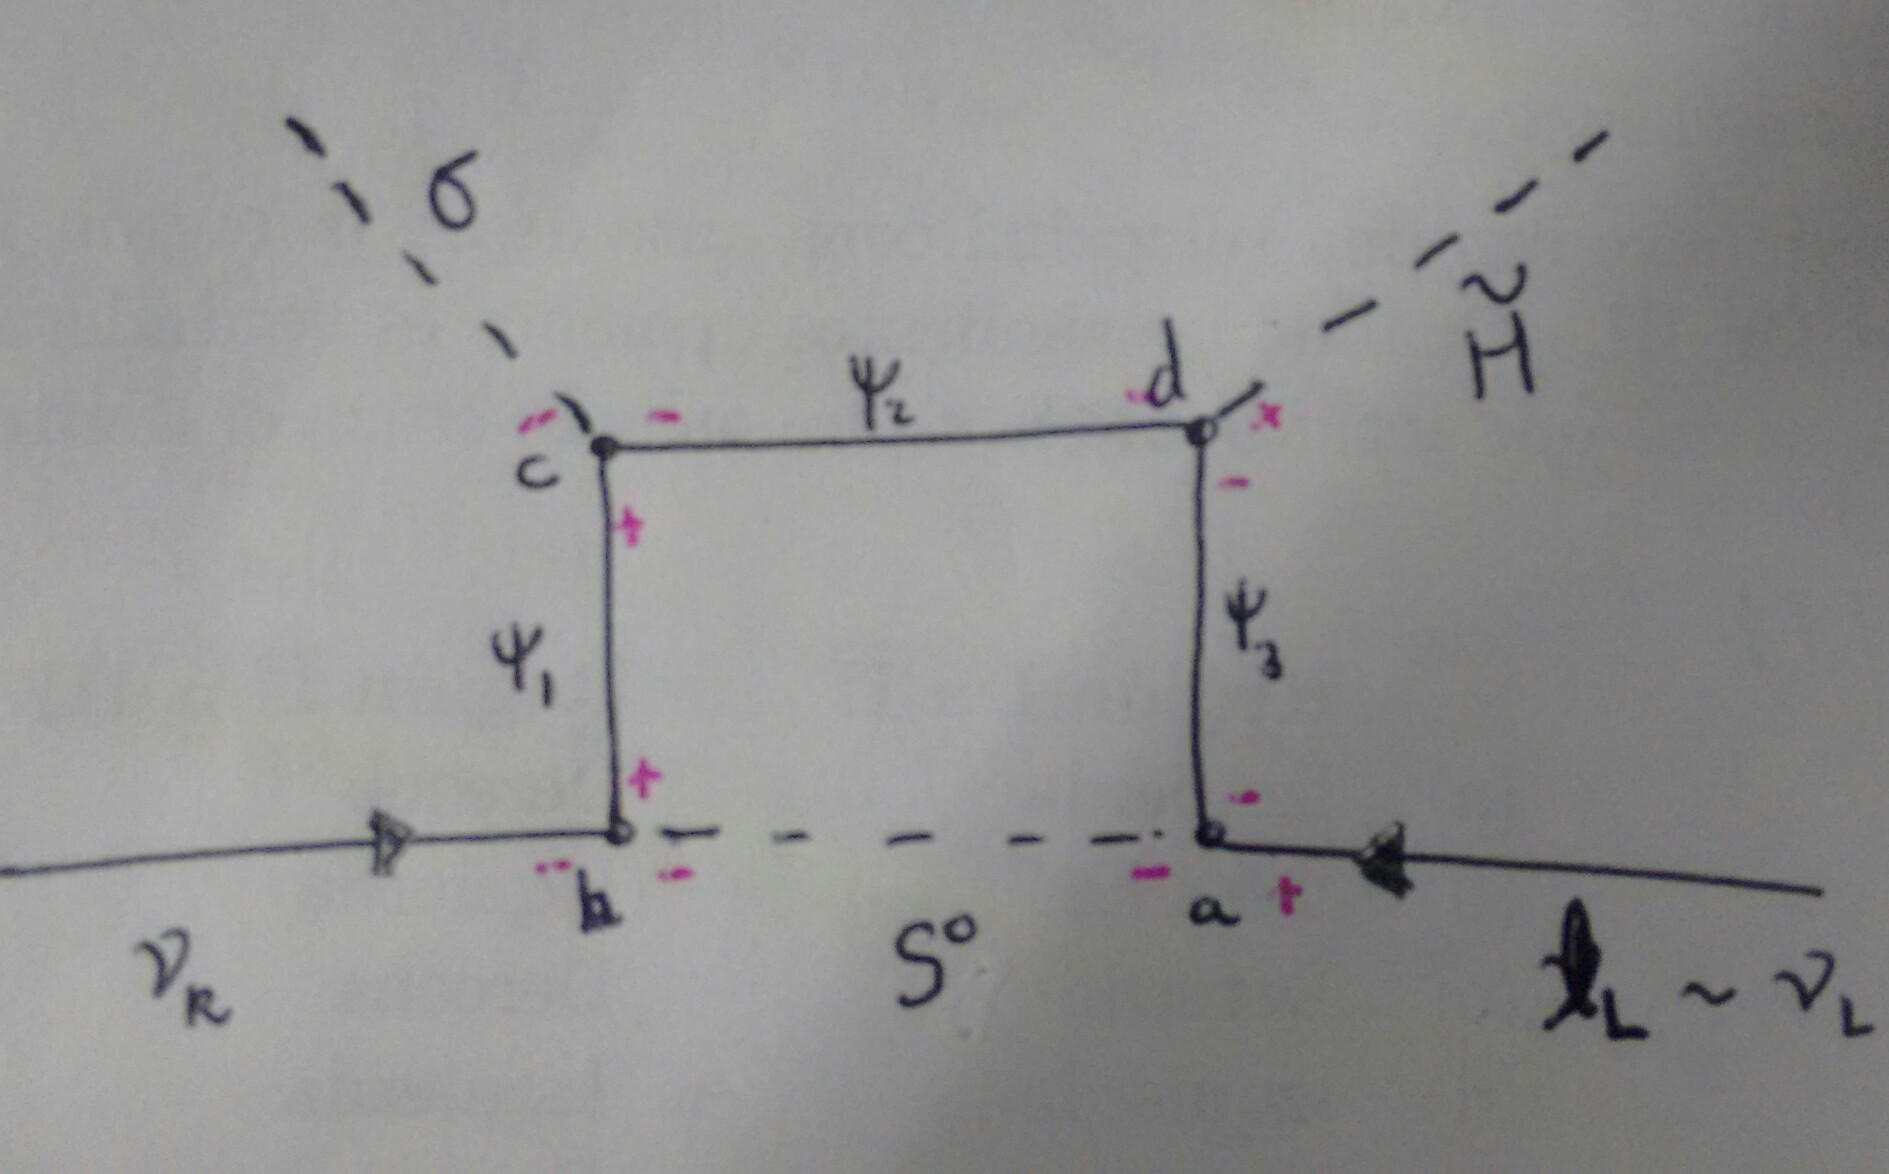

In [13]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.jpg", width=400)

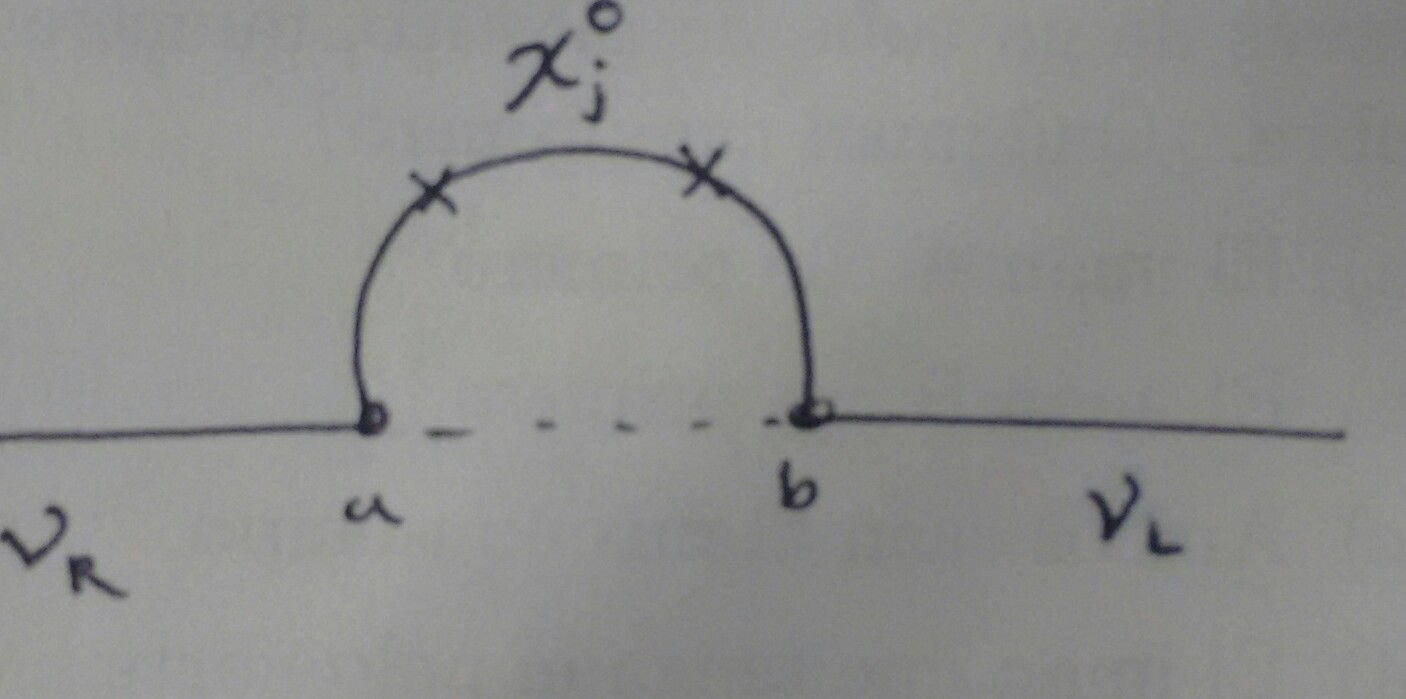

In [14]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-MB.jpg", width=400)

THREE DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^3
\dfrac{V_{k1}U_{k3}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

Import the analytical rutine for compute the $\mathcal{M}_{\alpha\beta}$

In [15]:
import neutrino_analytic

In [16]:
neutrino_analytic.MATRIXDIAG(YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,mChi1,mChi2,\
                             mS1,mS2,XV12,XV22,XU11,XU21)

(1.9640556738026148e-17, 1.9789866332352952e-13, 8.823990862396315e-09)

In [17]:
#Add to the DataFrame
xd['mn1'] = neutrino_analytic.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,\
                  xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mChi1,xd.mChi2,xd.mS1,xd.mS2,xd.XV12,xd.XV22,xd.XU11,xd.XU21)[0]
xd['mn2'] = neutrino_analytic.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,\
                  xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mChi1,xd.mChi2,xd.mS1,xd.mS2,xd.XV12,xd.XV22,xd.XU11,xd.XU21)[1]
xd['mn3'] = neutrino_analytic.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,\
                  xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mChi1,xd.mChi2,xd.mS1,xd.mS2,xd.XV12,xd.XV22,xd.XU11,xd.XU21)[2]

In [18]:
xd[['mv1','mv2','mv3','mn1','mn2','mn3']][:3]

,mv1,mv2,mv3,mn1,mn2,mn3
0,0.000000e+00,1.956405e-13,2.355326e-09,1.344697e-17,1.956405e-13,2.355326e-09
1,0.000000e+00,1.958128e-13,2.494711e-09,0.000000e+00,1.958128e-13,2.494711e-09
2,2.259126e-17,1.965365e-13,3.320613e-09,1.344697e-17,1.965365e-13,3.320613e-09


In [19]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

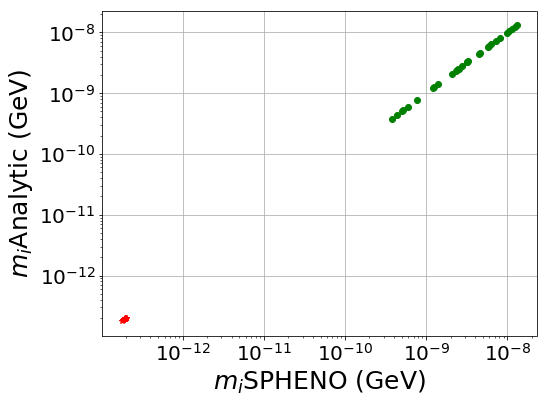

In [20]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd['mv2'],xd['mn2'],c='red', marker='*')
plt.loglog(xd.mv3,xd.mn3,'go')

plt.xlabel(r'$m_i$SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$Analytic (GeV)',size=25)

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')

plt.show()

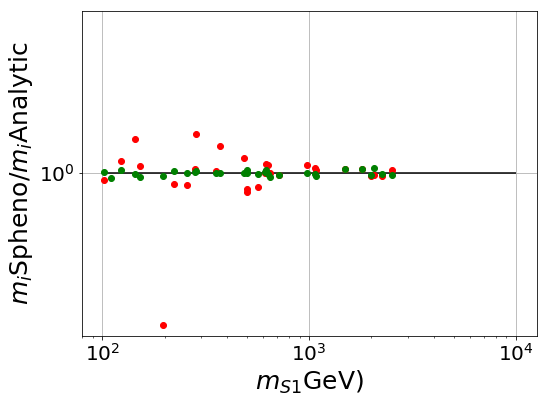

In [24]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog( xd.mS1, xd.mv2/xd.mn2,'ro')
plt.loglog( xd.mS1, xd.mv3/xd.mn3,'go')

plt.hlines(1, 1.0E+02, 1.0E+04)

plt.xlabel(r'$m_{S1}$GeV)',size=25)
plt.ylabel(r'$m_i$Spheno/$m_i$Analytic',size=25)

plt.grid()

plt.ylim(0.9999999,1.0000001)

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')

plt.show()

In [22]:
print(xd.shape[0])

30
